# CAS KAGGLE: Video games sales
Lucas Dalmau Garcés 1636290
Álvaro E. Martín Chango 1635979


Nuestro Kaggle será este: https://www.kaggle.com/ashaheedq/video-games-sales-2019


El dataset que usaremos contiene los datos sobre las ventas de videojueos en 2019. Dentro de todos los campos se encuentra el *global_sales* que será el target de la investigación, donde miraremos los factores que afectan a la venta global de videojuegos y veremos si tienen cierta correlación con otros campos del dataset.



In [1]:
#Imports para el proyecto
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer


# DATA EXPLORATION -->EDA (exploratory data analysis)

In [2]:
# Dataset
df = pd.read_csv('vgsales-12-4-2019_dataset.csv')
df

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,55789,Lost Ember,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,55790,Lost Ember,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55790,55791,Lost Ember,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [3]:
#Atributos de la base de datos
at = df.shape[1]
print("Atributos de la BD : " , at)
print(df.columns)

Atributos de la BD :  16
Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year'],
      dtype='object')


In [4]:
# Tipos de atributos 
types=df.dtypes
print(types)

Rank               int64
Name              object
Genre             object
ESRB_Rating       object
Platform          object
Publisher         object
Developer         object
Critic_Score     float64
User_Score       float64
Total_Shipped    float64
Global_Sales     float64
NA_Sales         float64
PAL_Sales        float64
JP_Sales         float64
Other_Sales      float64
Year             float64
dtype: object


In [5]:
#Mirar si hay NaNs y la cantidad por columna
are_nans=df.isna().sum() # los NaNs y nulls los toma igual 
print(are_nans)

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64


Antes de hacer la matriz de correlación vamos a ver la correlación entre los datos de forma numérica.

In [6]:
#Correlació entre X i Y
data_corr = (df.select_dtypes(include=[np.number])).corr() #hacemos la matriz de correlación unicamente con valores numericos
print(data_corr)

                   Rank  Critic_Score  User_Score  Total_Shipped  \
Rank           1.000000     -0.137650   -0.293034      -0.441132   
Critic_Score  -0.137650      1.000000    0.582673       0.203425   
User_Score    -0.293034      0.582673    1.000000      -0.025732   
Total_Shipped -0.441132      0.203425   -0.025732       1.000000   
Global_Sales  -0.554659      0.295941    0.241650            NaN   
NA_Sales      -0.550922      0.314285    0.234039            NaN   
PAL_Sales     -0.438841      0.253431    0.190490            NaN   
JP_Sales      -0.443212      0.174933    0.108721            NaN   
Other_Sales   -0.427737      0.254755    0.224679            NaN   
Year          -0.097345      0.015670   -0.116728      -0.169701   

               Global_Sales  NA_Sales  PAL_Sales  JP_Sales  Other_Sales  \
Rank              -0.554659 -0.550922  -0.438841 -0.443212    -0.427737   
Critic_Score       0.295941  0.314285   0.253431  0.174933     0.254755   
User_Score         0.24165

Para hacer la matriz de correlación usaremos el cmap coolwarm que dependiendo de la correlación entre la variables tenederá a tener colores mas azules o más rojos.
* Rojo --> Valores positivos --> Correlación positiva --> Las variables están relacionadas y por tanto si una se ve afectada por un evento, la otra también.
* Azul --> Valores negativos --> Correlación negativa --> Las variables no están relacionadas, por tanto una es independiente respecto la otra.

Ponemos tanto el mapa de calor como la matriz de correlación para poder tener una vista más visual y otra con los datos en ella.

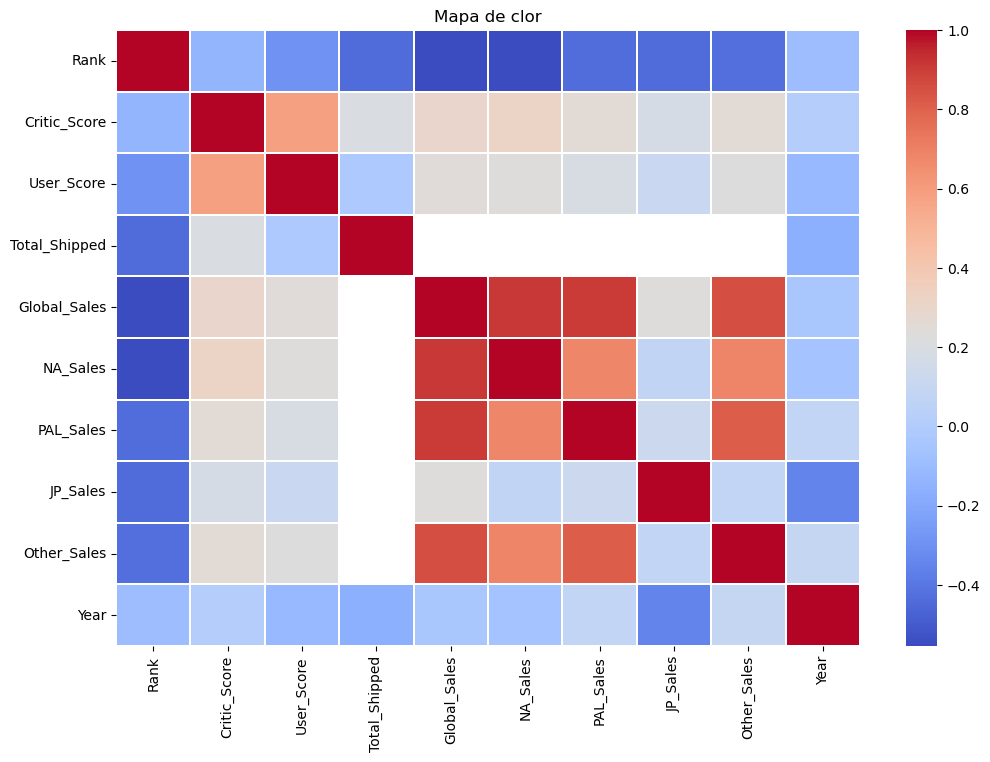

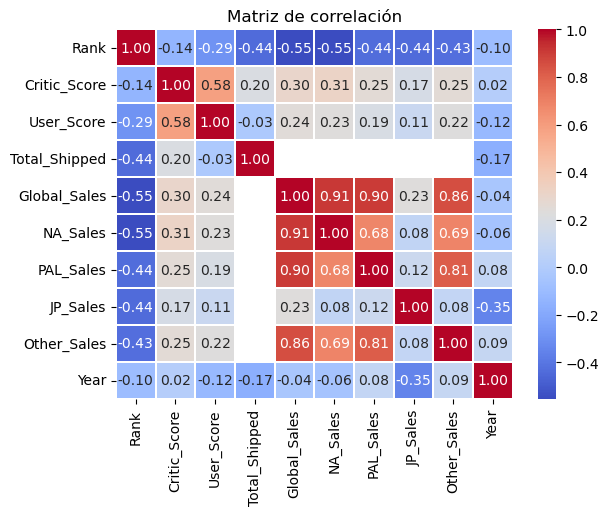

In [7]:
#Correlació entre X i Y
data_corr = df.corr()

#ajustar la gráfica para poder visualizarla --> TAmbién el mapa de calor
plt.figure(figsize=(12,8))

sns.heatmap(data_corr, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.2)
plt.title("Mapa de clor")
plt.show()


sns.heatmap(data_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.2)
plt.title("Matriz de correlación")
plt.show()



Como ya hemos dicho, el objetivo de nuestro medelo será realizar una predicción sobre las ventas globales, es por ello que vamos a comprobar si los valores son muy dispares o estan muy juntos, es decir, queremos observar dos cosas. Primero, si los valores de ventas estan concentrados en un punto muy pequeño (por ejemplo, que todas las ventas esten en valores muy cercanos entre si) y segundo, si hay valores extremos (outliers) los cuales pueden dificultar el entrenamiento del modelo.

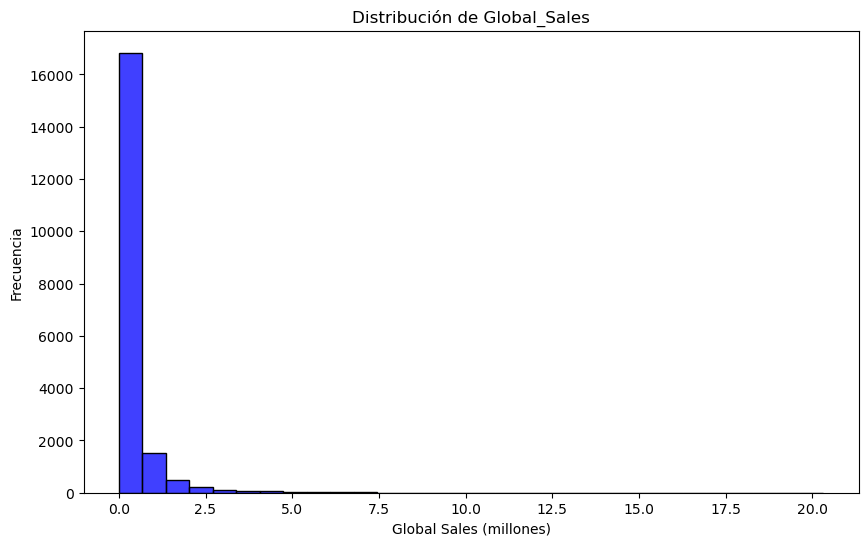

In [8]:
# Histograma de Global_Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=30, color='blue')
plt.title('Distribución de Global_Sales')
plt.xlabel('Global Sales (millones)')
plt.ylabel('Frecuencia')
plt.show()


Como podemos observar, los valores estan bastante juntos y se encuentran concentrados en valores bajos mientras que contamos con pocos valores que se alejan de esa concentración. Es por ello que, como hipotesis para nuestro futuro modelo, creemos que podria llegar a tener overfitting a causa de la mayor concentración de valores bajos, afectando así a la capacidad de generalización del modelo.

# Preprocessing 
Preparación de los datos antes de su procesamiento en los algoritmos --> Normalización de datos , selección de caracteristicas ...

Lo primero que queremos hacer antes de empezar a trabajar con los datos es ordenarlos y quitar los NaNs para poder trabajar de forma más efectiva con el dataset.
Para empezar vamos a ver que campos tienen impacto o relación con el target para poder así decidir que hacer con los NaNs de esos campos y también poder facilitar su uso. 
Campos con su tratamiento de NaN :
* **NA_sales, PAL_sales, JP_sales, Other_sales y Total_Shipped** --> Eliminar estas columnas ya que como global_sales es nuestro target no son campos relevantes.
* **Name** --> Eliminar esta columna ya que es un identificador único de cada juego y no creemos que pueda haber un patron generalizable con esta columna para el modelo.
* **ESBR_Rating  y developer** --> Eliminar filas con NaNs ya que són categorias que pueden ser muy relevantes para el estudio por tanto nos inetresa quedarnos con esta informacion y substituir los NaNs de estas columnas no es viable ya que son datos de tipo object(si fuesen numéricos se podría intentra aplicar alguna técnica para sustituir el valor del NaN).
* **Total_shiped, Critic_score, User_score, y Global_Sales(target)**  --> Sustituir NaN por la media de la columna ya que al ser valores numéricos si se puede tratar el NaN y consideramos que la media és el valor mas adecuado para estos casos debido a que no hay influencia de recogida de datos temporales ni nada por el estilo.
* **Year** --> Vamos a sustituir los NaNs de year por la moda de ésta ya que la media no tendría sentido y podemos asumir que el año que más se repite es el año donde más juegos se han lanzado al mercado, y por eso la moda es el mejor método para sustituir a los NaNs en este caso.
* **Publisher** --> Sustituir los NaNs con una "categoria" nueva que sería: publishers Desconocidos (Unknown) --> Por tanto, aquellos juegos que tienen NaN en publisher consideraremos que son de publicadores desconocidos.
***
Una vez realicemos los cambios ya comentados, nos debería quedar un dataset sin NaNs para poder aplicar las "Metric selection" y el "Model Selection".


In [9]:
#NA_sales, PAL_sales, JP_sales y Other_sales --> Eliminamos estas columnas ya que no son necesarias 
df = df.drop(['Name','NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales','Total_Shipped'], axis=1)


In [10]:
#Mirar si hay NaNs y la cantidad por columna
are_nans=df.isna().sum() # los NaNs y nulls los toma igual 
print(are_nans)

Rank                0
Genre               0
ESRB_Rating     32169
Platform            0
Publisher           0
Developer          17
Critic_Score    49256
User_Score      55457
Global_Sales    36377
Year              979
dtype: int64


In [11]:
#Cambiamos los NaNs de Critic score,de user score y de Global_Sales por la media de la columna
df['Critic_Score'].fillna(df['Critic_Score'].mean(), inplace=True)
df['User_Score'].fillna(df['User_Score'].mean(), inplace=True)
df['Global_Sales'].fillna(df['Global_Sales'].mean(), inplace=True)

In [12]:
are_nans=df.isna().sum() 
print(are_nans)

Rank                0
Genre               0
ESRB_Rating     32169
Platform            0
Publisher           0
Developer          17
Critic_Score        0
User_Score          0
Global_Sales        0
Year              979
dtype: int64


In [13]:
#Eliminamos las filas con NaNs de ESRB_Rating y de developer --> No se puede sustituir los nans 
df = df.dropna(subset=['ESRB_Rating', 'Developer'])

In [14]:
are_nans=df.isna().sum() 
print(are_nans)

Rank             0
Genre            0
ESRB_Rating      0
Platform         0
Publisher        0
Developer        0
Critic_Score     0
User_Score       0
Global_Sales     0
Year            99
dtype: int64


In [15]:
df['Publisher'].fillna('Unknown', inplace=True) #En este caso no tiene NaNs  --> No hace falta comprobar que se han eliminado

modaYear = df['Year'].mode()[0]
print(f"La moda de YEAR es: {modaYear}")


La moda de YEAR es: 2009.0


In [16]:
df['Year'].fillna(modaYear, inplace=True)

In [17]:
#Comprobar que ya no hay NaNs en ningun parámetro
print(df.isna().sum())

Rank            0
Genre           0
ESRB_Rating     0
Platform        0
Publisher       0
Developer       0
Critic_Score    0
User_Score      0
Global_Sales    0
Year            0
dtype: int64


# Metric Selection 
Probar diferentes metricas es muy importante ya que nos ayuda a medir el rendimeinto del modelo que entrenemos. Como nuestro target se define en un rango de valores continuos, usaremos un modelo de regresión y es por esto mismo que nuestra forma de evaluar el rendimiento de nuestro modelo se basará en las siguientes metricas:

**Error Cuadrático Medio (MSE):** Penaliza los errores grandes más que los pequeños, ya que eleva al cuadrado las diferencias entre las predicciones y los valores reales. Esto hace que el modelo sea más sensible a los errores grandes y trate de minimizarlos

**Raíz del Error Cuadrático Medio (RMSE):** Calcula la diferencia entre los valores que el modelo predice y los valores reales, entonces, eleva al cuadrado la diferencia para  luego promediar esos valores y al final hacer la raíz cuadrada de ese promedio para que así los errores tengan un tamaño ajustado al tamaño de los valores originales.

**Error Absoluto Medio (MAE):** Calcula la diferencia entre los valores que el modelo nos predice y los valores reales, y luego calcula el promedio de esas diferencias de forma absoluta (sin importar si la diferencia es absoluta o relativa)

**Coeficiente de Determinación (R²)** Nos indica que tan bien se està capturando la relación entre las variables que usamos para predecir la variable dependiente (Ejemplo simplificado: si tenemos un 0.9 (90%) quiere decir que las variables predictoras han sido muy utiles para predecir la variable objetivo).


# Model Selection 


OBS Para finalizar con la preparación de los datos para nuestro modelo, debemos aplicar One-Hot encoding para poder transformar nuestras varaibles categoricas en valores de 0 o 1 que el modelo entiende mejor. 

Lo primero que haremos será definir target y separar los atributos para asegurarnos que Global_sales no esté dentro de los datos predictivos.
Para hacer esta separación de atributos, lo haremos mediante el tipo de datos que hay (bisto en el EDA) --> int64 y de tipo object.

In [18]:
# Separar atributos y target para poder procesar los datos 
target = 'Global_Sales'
attributes = [col for col in df.columns if col != target]

# Separar los atributos por los tipos de datos
col_numericas = df[attributes].select_dtypes(include=['int64', 'float64']).columns.tolist()
col_categoricas = df[attributes].select_dtypes(include=['object', 'category']).columns.tolist()

Ahora lo que haremos es normalizar los datos numericos mediante los pipelines y una vez estandarizados haremos el one-hot encoding para poder usar esos datos en los algoritmos .

In [19]:
# Crear pipelines para preparar los datos 
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Usamos las pipelines para obtener una matriz con los datos listos para ser usados en algoritmos.
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, col_numericas),
    ('cat', categorical_transformer, col_categoricas)
])

# Pipeline para poder hacer cross validatio
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

El siguiente paso será dividir los datos en entrenamiento y datos de prueba para aplicar los dos modelos que usaremos --> Regresión lineal y el Random Forest Regression.

In [20]:
# Dividir los datos en entrenamiento y prueba
X = df[attributes]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Diccionario de modelos que vamos a usar
models = {
    "Regresión Lineal": {
        "model": Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ]),
        "params": {}  # La regresión lineal no requiere hiperparámetros
    },
    "Random Forest Regression": {
        "model": Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor(random_state=42))
        ]),
        "params": {
            'regressor__n_estimators': [800, 900, 1000],
            'regressor__max_depth': [23, 24, 25],
            'regressor__max_features': ['auto', 'sqrt', 'log2']
        }
    }
}

# EVALUACIÓN DE MODELOS

Ahora realizaremos la evaluación de los distintos modelos que usaremos para ver el rendimiento. Cabe destacar que se entrenará con validación cruzada(Kfold) y también se ajustaran los hiperparámetros con GridSearch(cuando se pueda usar).
Para presentar los resultados usaremos las métricas antes comentadas cómo el MSE, RMSE, MAE y el R².
También realizaremos una validación cruzada sobre todo el pipeline --> Nos dará una mejor estimación del rendimiento de los modelos, reduce la posibilidad de sobreajuste al usar varias particiones.

Lo primero que haremos será llamar al kfold y definir la métrica de la validación cruzda para que posteriormente nos de un sistema de puntuaciones de cross_val_score.

In [21]:
# Evaluar modelos
results = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Definir la métrica para validación cruzada
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Calcular la puntuacion de la validación cruzada 
cv_scores = cross_val_score(
    estimator=model_pipeline,
    X=X,
    y=y,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1  # Lo que hace esto es que se pueda procesar más rápido
)

Ahora lo que haremos será entrenar a los modelos con los algoritmos de Linear Regression y Random Forest Regression y posteriormente se sleccionará el mejor modelo en base a los resultados.

El código tendrá un bucle donde se cogerá los algoritmos dentro el diccionario de models.
* Caso 1 --> Hay hiperparámetros --> GridSearchCV --> Entrenamiento del modelo con estos hiperparámetros, buscando la mejor combinación de éstos.
* CAso 2 --> No hay hiperparámetros --> Entrena al modelo directamente con los datos de entrenamiento.

In [22]:

for model_name, model_info in models.items():
    print(f"Entrenando modelo: {model_name}")
    
    if model_info["params"]:
        # Usar GridSearchCV para modelos con hiperparámetros
        grid_search = GridSearchCV(
            estimator=model_info["model"],
            param_grid=model_info["params"],
            cv=kfold,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            verbose=1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        # Entrenar directamente si no hay hiperparámetros
        best_model = model_info["model"]
        best_model.fit(X_train, y_train)
        best_params = "No aplica"

    # Predicción en datos de entrenamiento y prueba
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    # Evaluar rendimiento en conjunto de entrenamiento
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Evaluar rendimiento en conjunto de prueba
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Guardar resultados
    results.append([
        model_name,
        mse_train, rmse_train, mae_train, r2_train,  # Métricas de entrenamiento
        mse_test, rmse_test, mae_test, r2_test,      
        best_params
    ])

Entrenando modelo: Regresión Lineal
Entrenando modelo: Random Forest Regression
Fitting 10 folds for each of 27 candidates, totalling 270 fits


Finalmente lo que queremos hacer es presentar los resultados de forma que podamos sacar ciertas conclusiones y así analizar el rendimiento de los modelos.

In [23]:

results_df = pd.DataFrame(results, columns=[
    'Modelo',
    'MSE (Train)', 'RMSE (Train)', 'MAE (Train)', 'R² (Train)',
    'MSE (Test)', 'RMSE (Test)', 'MAE (Test)', 'R² (Test)',
    'Hiperparámetros'
])

# Mostrar hiperparametros
print("Resultados de los modelos:")
print(results_df.to_string(index=False))


# MSE --> RMSE para poder interpretarlo bien (MSE daba negativo)
print(cv_scores)
cv_rmse = (-cv_scores) ** 0.5

print(" ")
print(f"RMSE promedio(Cross Validation): {cv_rmse.mean():.4f}")
print(f"Desviación estándar del RMSE (Cross validation): {cv_rmse.std():.4f}")

Resultados de los modelos:
                  Modelo  MSE (Train)  RMSE (Train)  MAE (Train)  R² (Train)  MSE (Test)  RMSE (Test)  MAE (Test)  R² (Test)                                                                                 Hiperparámetros
        Regresión Lineal     0.352408      0.593639     0.271178    0.347668    0.424278     0.651366    0.331635   0.169454                                                                                       No aplica
Random Forest Regression     0.012374      0.111239     0.011947    0.977095    0.085788     0.292896    0.030885   0.832066 {'regressor__max_depth': 23, 'regressor__max_features': 'auto', 'regressor__n_estimators': 800}
[-0.02785745 -0.109334   -0.10310795 -0.10140673 -0.0778628  -0.08591442
 -0.17627947 -0.0332342  -0.10017698 -0.0775734 ]
 
RMSE promedio(Cross Validation): 0.2906
Desviación estándar del RMSE (Cross validation): 0.0693


# CONCLUSIONES